In [1]:
import subprocess
import re 

In [3]:
def run_conv2d(engine, input_dir, color_mode="rgb", runs=1):
    cmd = [
        "./02-run.sh",
        "--mode", "speed",
        "--engine", engine, 
        "--ktype", "sharpen", 
        "--ksize", "3",
        "--input", input_dir,
        "--color", color_mode
    ]
    
    times = []
    pattern = re.compile(
        r"\[TIMING\]\s+Engine:\s+\S+\s+took\s+([\d.]+)\s+ms"
    )
    for _ in range(runs):
        result = subprocess.run(
            cmd, 
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )
        
        match = pattern.search(result.stdout)
        if match: 
            times.append(float(match.group(1)))
        else: 
            print("Timing line not found in output")
        
    return times

In [4]:
image_dir  = "images/normal-small"
color_mode = "rgb" 
runs = 1


baseline_times = run_conv2d("baseline", image_dir, color_mode, runs)
sse_times      = run_conv2d("sse", image_dir, color_mode, runs)
avx_times      = run_conv2d("avx", image_dir, color_mode, runs)

In [5]:
import numpy as np

results = {
    "Baseline": np.mean(baseline_times),
    "SSE": np.mean(sse_times),
    "AVX": np.mean(avx_times),
}

results

{'Baseline': 5399.248169, 'SSE': 1601.304544, 'AVX': 1419.072069}

In [6]:
speedup_sse = results["Baseline"] / results["SSE"] 
speedup_avx = results["Baseline"] / results["AVX"]

speedup_sse, speedup_avx

(3.3717809577389173, 3.8047737581113648)

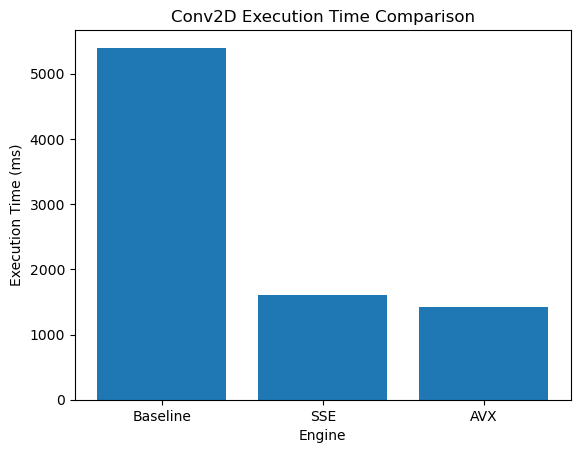

In [7]:
import matplotlib.pyplot as plt 

engines = list(results.keys())
times   = list(results.values())

plt.figure()
plt.bar(engines, times)
plt.ylabel("Execution Time (ms)")
plt.xlabel("Engine")
plt.title("Conv2D Execution Time Comparison")
plt.show()

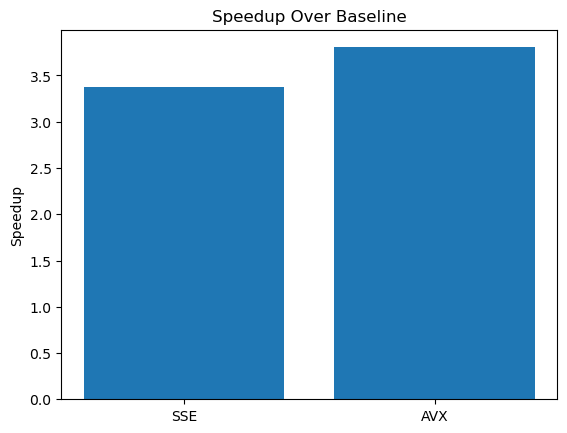

In [8]:
plt.figure()
plt.bar(["SSE", "AVX"], [speedup_sse, speedup_avx])
plt.ylabel("Speedup")
plt.title("Speedup Over Baseline")
plt.show()